In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import wilcoxon, shapiro
import seaborn as sns

## Parameter Steering

In [2]:
w_steering = pd.read_csv('experiment-results/results_w_steering.csv')
c1_steering = pd.read_csv('experiment-results/results_c1_steering.csv')
c2_steering = pd.read_csv('experiment-results/results_c2_steering.csv')

In [3]:
w_steering = w_steering.round(3)
c1_steering = c1_steering.round(3)
c2_steering = c2_steering.round(3)
w_steering

,Unnamed: 0,Steered Parameter Value,Fitness,Time
0,0,0.01,0.891,11.132
1,1,0.01,0.876,11.270
2,2,0.01,0.889,11.251
3,3,0.01,0.897,11.233
4,4,0.01,0.888,11.154
...,...,...,...,...
395,395,0.40,0.824,12.221
396,396,0.40,0.831,12.147
397,397,0.40,0.820,12.186
398,398,0.40,0.816,12.037


In [4]:
w_steering_mean = w_steering.groupby('Steered Parameter Value').mean()
c1_steering_mean = c1_steering.groupby('Steered Parameter Value').mean()
c2_steering_mean = c2_steering.groupby('Steered Parameter Value').mean()
c2_steering_mean

,Unnamed: 0,Fitness,Time
Steered Parameter Value,,,
0.2,4.5,0.8657,11.1977
0.4,14.5,0.8810,11.1161
0.6,24.5,0.8849,11.1387
0.8,34.5,0.8882,11.0765
1.0,44.5,0.8917,11.0666
1.2,54.5,0.8883,11.0362
1.4,64.5,0.8951,11.0241
1.6,74.5,0.8922,10.9889
1.8,84.5,0.8953,11.0238


In [5]:
w_steering_mean.index

Float64Index([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09,  0.1, 0.11,
              0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19,  0.2, 0.21, 0.22,
              0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29,  0.3, 0.31, 0.32, 0.33,
              0.34, 0.35, 0.36, 0.37, 0.38, 0.39,  0.4],
             dtype='float64', name='Steered Parameter Value')

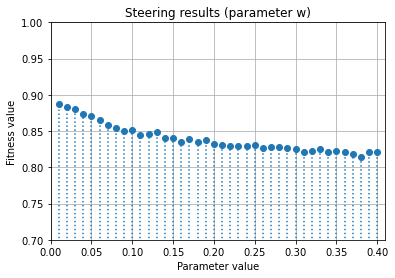

In [6]:
plt.stem(w_steering_mean.index, w_steering_mean['Fitness'], linefmt=':')
plt.title('Steering results (parameter w)')
plt.xlim(0, 0.41)
plt.ylim(0.7, 1.0)
plt.xlabel('Parameter value')
plt.ylabel('Fitness value')
plt.grid()

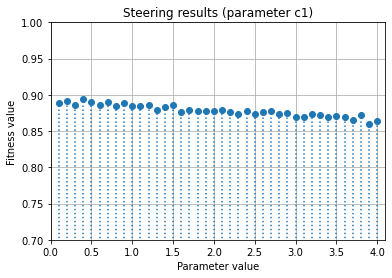

In [7]:
plt.stem(c1_steering_mean.index, c1_steering_mean['Fitness'], linefmt=':')
plt.title('Steering results (parameter c1)')
plt.xlim(0, 4.1)
plt.ylim(0.7, 1.0)
plt.xlabel('Parameter value')
plt.ylabel('Fitness value')
plt.grid()

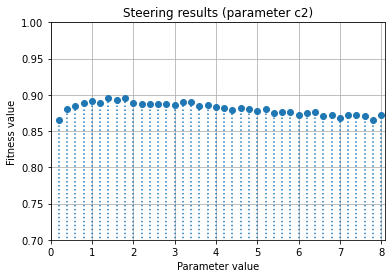

In [8]:
plt.stem(c2_steering_mean.index, c2_steering_mean['Fitness'], linefmt=':')
plt.title('Steering results (parameter c2)')
plt.xlim(0, 8.1)
plt.ylim(0.7, 1.0)
plt.xlabel('Parameter value')
plt.ylabel('Fitness value')
plt.grid()

## Comparative analysis of algorithms

In [9]:
comparative = pd.read_csv('experiment-results/results_comparative_exp.csv')
comparative

,Unnamed: 0,Instance Size,Fitness Nature,Time Nature,Fitness Greedy,Time Greedy
0,0,10,0.900000,4.224389,0.900000,0.000702
1,1,10,0.900000,4.421748,0.900000,0.000663
2,2,10,0.900000,5.062894,0.850000,0.000896
3,3,10,0.900000,4.087815,0.875000,0.000668
4,4,10,0.900000,4.040277,0.900000,0.000663
...,...,...,...,...,...,...
235,235,1000,0.758648,20.045836,0.748990,0.079289
236,236,1000,0.757568,19.938715,0.749827,0.079652
237,237,1000,0.757348,20.045015,0.750590,0.079183
238,238,1000,0.758320,19.966142,0.749952,0.080543


In [10]:
comparative_mean = comparative.groupby('Instance Size').mean()
comparative_mean

,Unnamed: 0,Fitness Nature,Time Nature,Fitness Greedy,Time Greedy
Instance Size,,,,,
10,14.5,0.894167,4.121098,0.878333,0.000679
15,44.5,0.885926,4.106809,0.857407,0.000934
25,74.5,0.862400,4.198599,0.815067,0.001468
50,104.5,0.842300,4.467752,0.768900,0.002785
100,134.5,0.813750,4.939597,0.754075,0.005934
200,164.5,0.786144,6.081961,0.750883,0.012353
500,194.5,0.765843,11.540193,0.750616,0.035675
1000,224.5,0.757921,19.976423,0.750085,0.079645


In [11]:
comparative_mean.index.map(str)

Index(['10', '15', '25', '50', '100', '200', '500', '1000'], dtype='object', name='Instance Size')

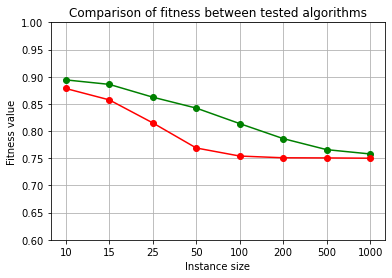

In [12]:
plt.plot(comparative_mean.index.map(str), comparative_mean['Fitness Nature'], marker='o', color='green')
plt.plot(comparative_mean.index.map(str), comparative_mean['Fitness Greedy'], marker='o', color='red')
plt.title('Comparison of fitness between tested algorithms')
# plt.xlim(0, 8.1)
plt.ylim(0.6, 1.0)
plt.xlabel('Instance size')
plt.ylabel('Fitness value')
plt.grid()

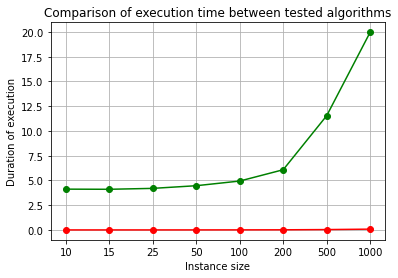

In [13]:
plt.plot(comparative_mean.index.map(str), comparative_mean['Time Nature'], marker='o', color='green')
plt.plot(comparative_mean.index.map(str), comparative_mean['Time Greedy'], marker='o', color='red')
plt.title('Comparison of execution time between tested algorithms')
# plt.xlim(0, 8.1)
# plt.ylim(0.6, 1.0)
plt.xlabel('Instance size')
plt.ylabel('Duration of execution')
plt.grid()

In [14]:
t_value, p_value = wilcoxon(comparative_mean['Fitness Nature'], comparative_mean['Fitness Greedy'], alternative='greater')

In [15]:
wilcoxon(comparative_mean['Fitness Nature'], comparative_mean['Fitness Greedy'], alternative='greater')

WilcoxonResult(statistic=36.0, pvalue=0.00390625)

(0.71, 0.91)

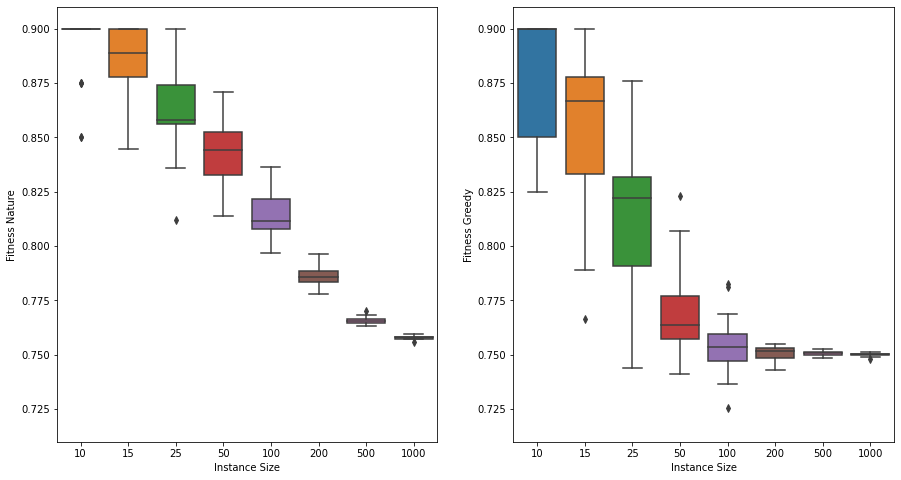

In [16]:
sig, axs = plt.subplots(1, 2, figsize=(15,8))
sns.boxplot(x='Instance Size', y='Fitness Nature', data=comparative[['Instance Size', 'Fitness Nature']], orient='v', ax=axs[0])
sns.boxplot(x='Instance Size', y='Fitness Greedy', data=comparative[['Instance Size', 'Fitness Greedy']], orient='v', ax=axs[1])
axs[0].set_ylim(0.71, 0.91)
axs[1].set_ylim(0.71, 0.91)